In [ ]:
import time
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_excel('/content/kurs.xlsx')

In [ ]:
df.head()

,kurs jual,kurs beli,kurs tengah,tanggal
0,13972.52,13833.49,13903.01,2021-01-04
1,14014.73,13875.28,13945.01,2021-01-05
2,13995.63,13856.37,13926.00,2021-01-06
3,14007.69,13868.31,13938.00,2021-01-07
4,14128.29,13987.71,14058.00,2021-01-08


In [ ]:
df.tail(10)

,kurs jual,kurs beli,kurs tengah,tanggal
697,15834.78,15677.22,15756.0,2024-03-06
698,15801.61,15644.39,15723.0,2024-03-07
699,15736.29,15579.71,15658.0,2024-03-08
700,15681.01,15524.99,15603.0,2024-03-13
701,15653.88,15498.12,15576.0,2024-03-14
702,15659.91,15504.09,15582.0,2024-03-15
703,15702.12,15545.88,15624.0,2024-03-18
704,15750.36,15593.64,15672.0,2024-03-19
705,15790.56,15633.44,15712.0,2024-03-20
706,15805.64,15648.36,15727.0,2024-03-21


In [ ]:
df.shape

(707, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   kurs jual    707 non-null    object        
 1   kurs beli    707 non-null    float64       
 2   kurs tengah  707 non-null    float64       
 3   tanggal      707 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 22.2+ KB


In [ ]:
#  mengambil kolom data yang akan digunakan
df = df[["tanggal","kurs tengah"]].copy()

In [ ]:
df.columns=["tanggal","kurs tengah"]
df.head()

,tanggal,kurs tengah
0,2021-01-04,13903.01
1,2021-01-05,13945.01
2,2021-01-06,13926.00
3,2021-01-07,13938.00
4,2021-01-08,14058.00


In [ ]:
# set kolom tanggal sebagai datetime
df['tanggal']=pd.to_datetime(df['tanggal'])

In [ ]:
df.set_index('tanggal',inplace=True)

In [ ]:
df.describe()

,kurs tengah
count,707.000000
mean,14930.955276
std,531.554813
min,13875.010000
25%,14421.010000
50%,14920.000000
75%,15437.000000
max,15946.000000


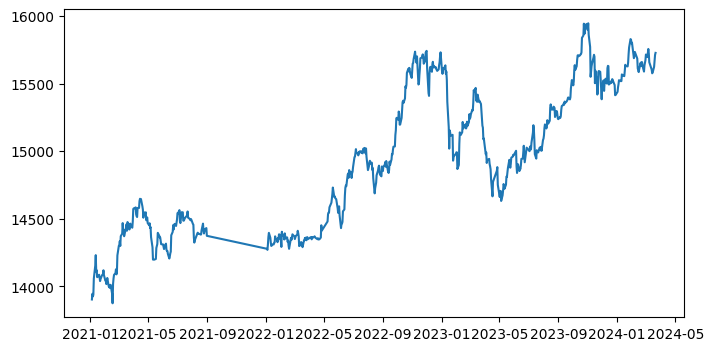

In [ ]:
plt.figure(1, figsize=(8,4))
_= plt.plot(df['kurs tengah'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['kurs tengah'].dropna())
print("ADF Statistic: %s " % result[0])
print("p-value: %s " % result[1])

ADF Statistic: -1.4120097115409427 
p-value: 0.5765051617281264 


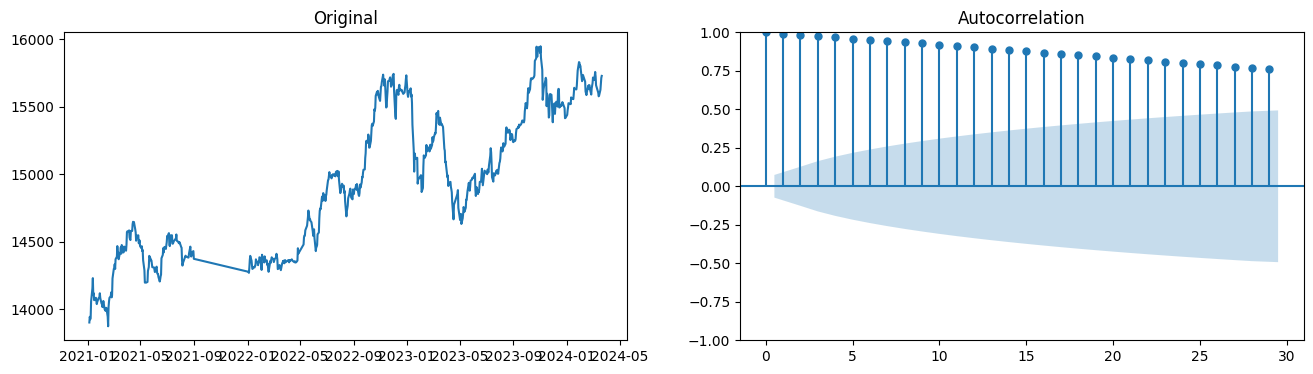

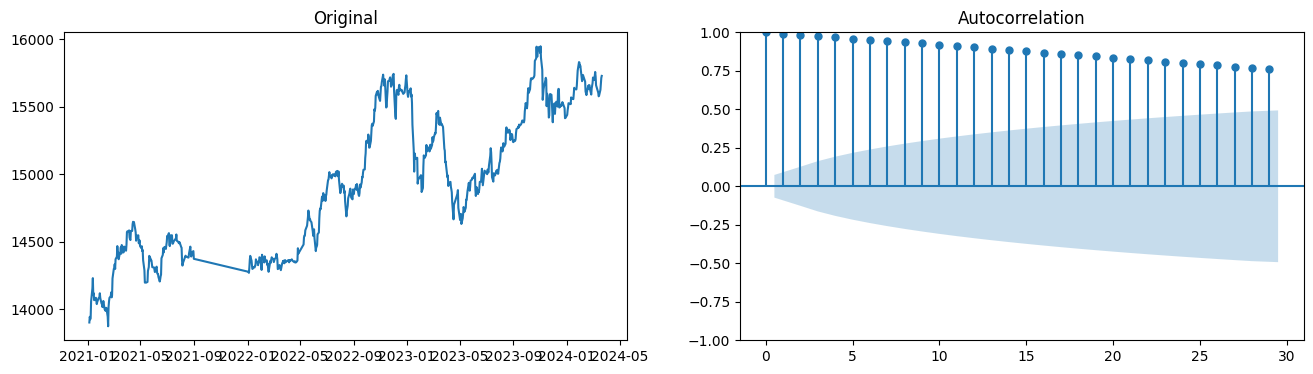

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(df['kurs tengah'])
ax1.set_title('Original')
plot_acf(df['kurs tengah'], ax=ax2)

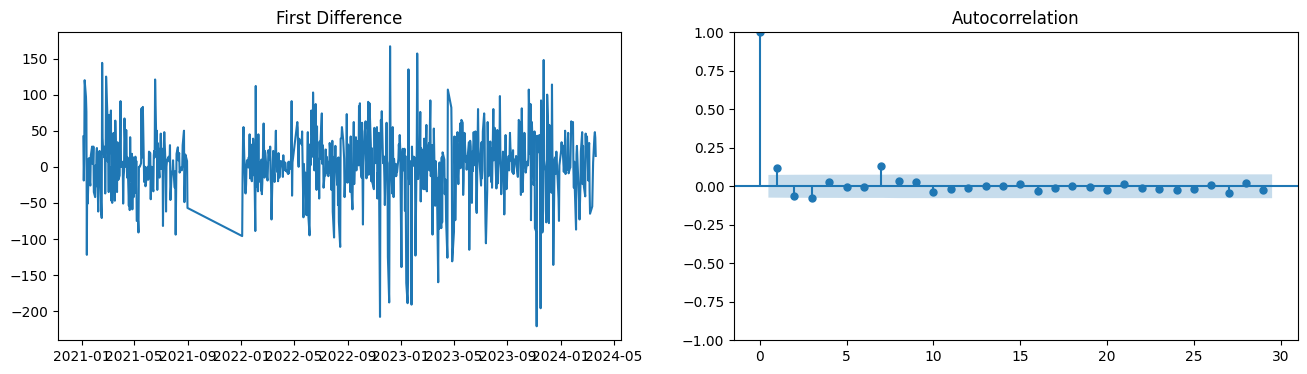

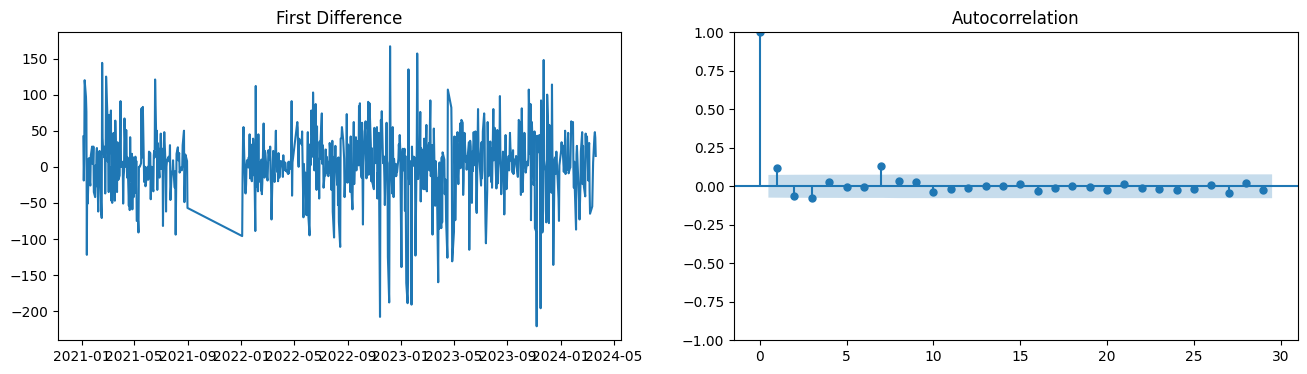

In [ ]:
diff = df['kurs tengah'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('First Difference')
plot_acf(diff, ax=ax2)

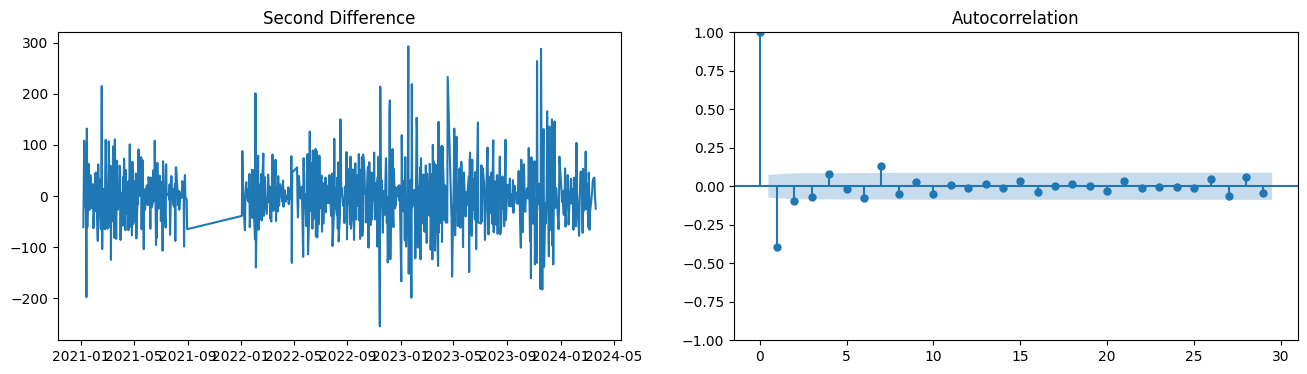

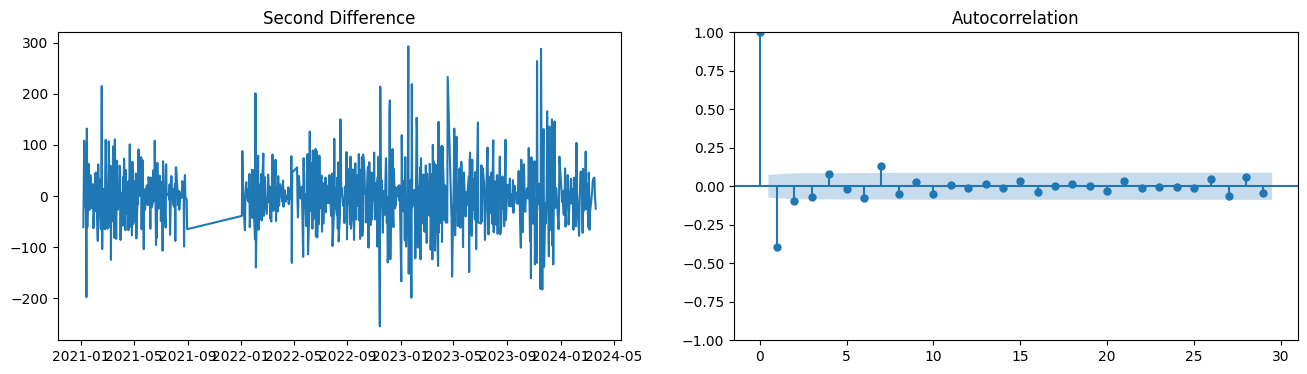

In [ ]:
diff = df['kurs tengah'].diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('Second Difference')
plot_acf(diff, ax=ax2)

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima.utils import ndiffs

ndiffs(df['kurs tengah'], test='adf')

1

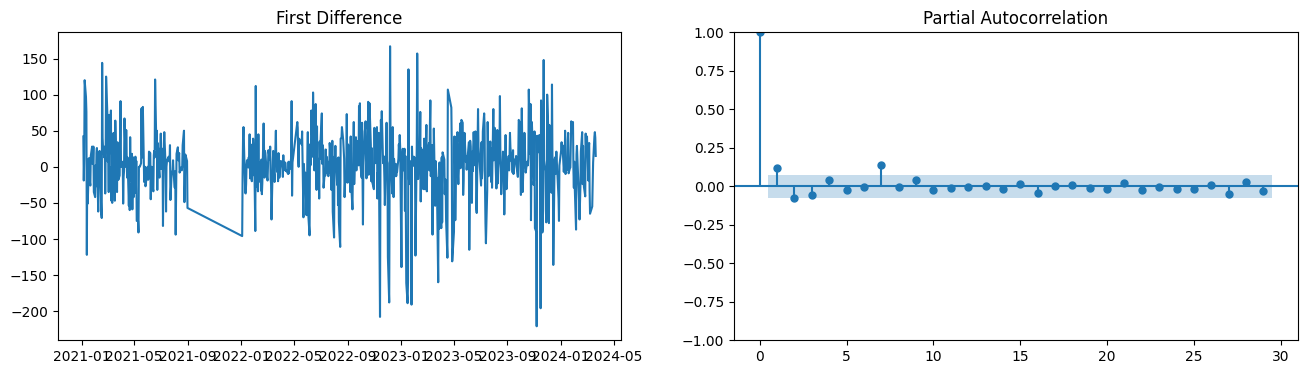

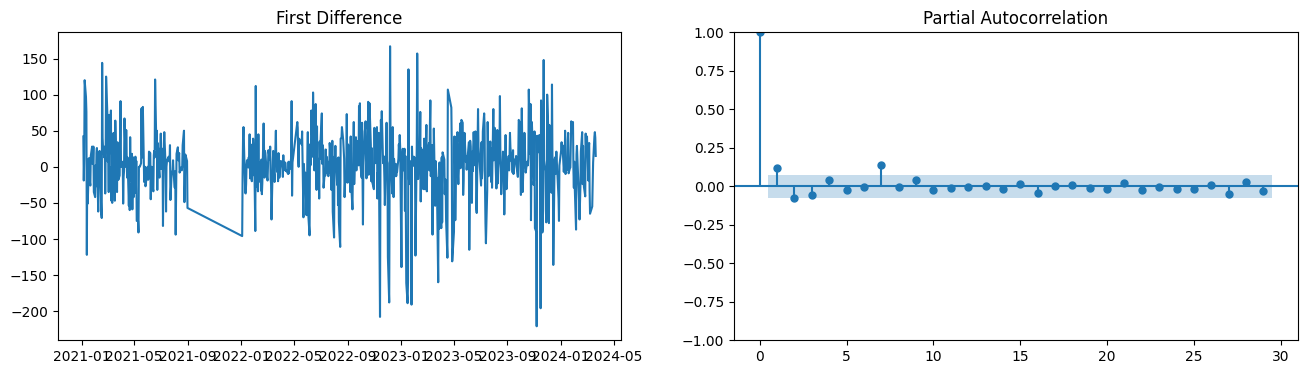

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = df['kurs tengah'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title('First Difference')
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['kurs tengah'], order=(6,0,3))
result = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:            kurs tengah   No. Observations:                  707
Model:                 ARIMA(6, 0, 3)   Log Likelihood               -3736.275
Date:                Tue, 09 Apr 2024   AIC                           7494.550
Time:                        13:32:31   BIC                           7544.722
Sample:                             0   HQIC                          7513.936
                                - 707                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.493e+04    490.199     30.459      0.000     1.4e+04    1.59e+04
ar.L1         -0.8849      0.251     -3.531      0.000      -1.376      -0.394
ar.L2          0.3813      0.121      3.155      0.0

(array([1.19705465e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.59116395e-05, 3.47145848e-04,
        6.46409510e-03, 1.60405323e-03]),
 array([-1027.94494181,  -909.78599568,  -791.62704956,  -673.46810344,
         -555.30915732,  -437.1502112 ,  -318.99126508,  -200.83231896,
          -82.67337284,    35.48557328,   153.64451941]),
 <BarContainer object of 10 artists>)

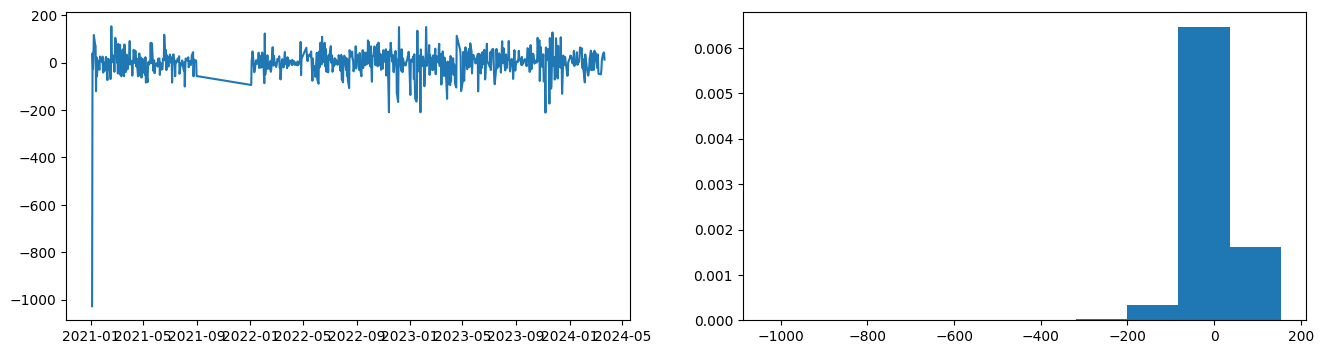

In [ ]:
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1 , 2, figsize=(16,4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

In [ ]:
len(df)

707

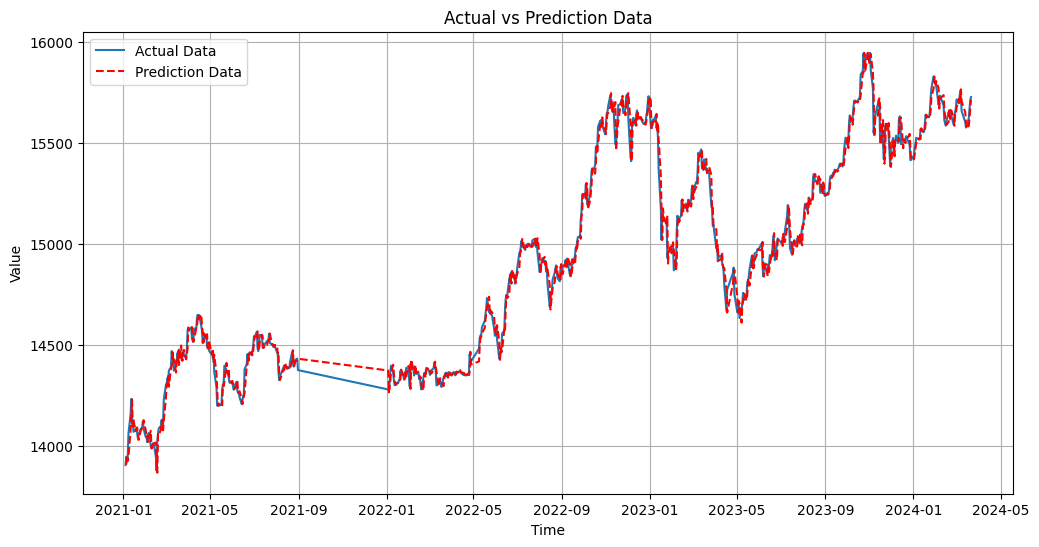

In [ ]:
prediction = result.predict(start=1, end=len(df)-1)

# Plot actual data and prediction data
plt.figure(figsize=(12, 6))
plt.plot(df['kurs tengah'], label='Actual Data')
plt.plot(prediction, label='Prediction Data', linestyle='--', color='red')
plt.title('Actual vs Prediction Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate RMSE
actual_values = df['kurs tengah']
rmse = np.sqrt(((prediction - actual_values) ** 2).mean())
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual_values - prediction) / actual_values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Root Mean Squared Error (RMSE): 47.52332744980682
Mean Absolute Percentage Error (MAPE): 0.22955592198211366%


In [ ]:
start_forecast = len(df)
end_forecast = start_forecast+364
forecast = result.predict(start=start_forecast, end=end_forecast)

In [ ]:
print(forecast)

707     15722.869155
708     15718.822607
709     15717.825951
710     15716.115574
711     15713.057015
            ...     
1067    15246.046842
1068    15245.242508
1069    15244.440226
1070    15243.639993
1071    15242.841802
Name: predicted_mean, Length: 365, dtype: float64


In [ ]:
# membuat data tnaggal forecasting 1 tahun kedepan
date_forecast = pd.date_range(start=df.index[-1], periods=365, freq='D') + pd.DateOffset(days=1)
df_forecast = pd.DataFrame({'tanggal': date_forecast, 'nilai_forecast': forecast})
df_forecast = df_forecast.set_index('tanggal')

In [ ]:
df_forecast

,nilai_forecast
tanggal,
2024-03-22,15722.869155
2024-03-23,15718.822607
2024-03-24,15717.825951
2024-03-25,15716.115574
2024-03-26,15713.057015
...,...
2025-03-17,15246.046842
2025-03-18,15245.242508
2025-03-19,15244.440226


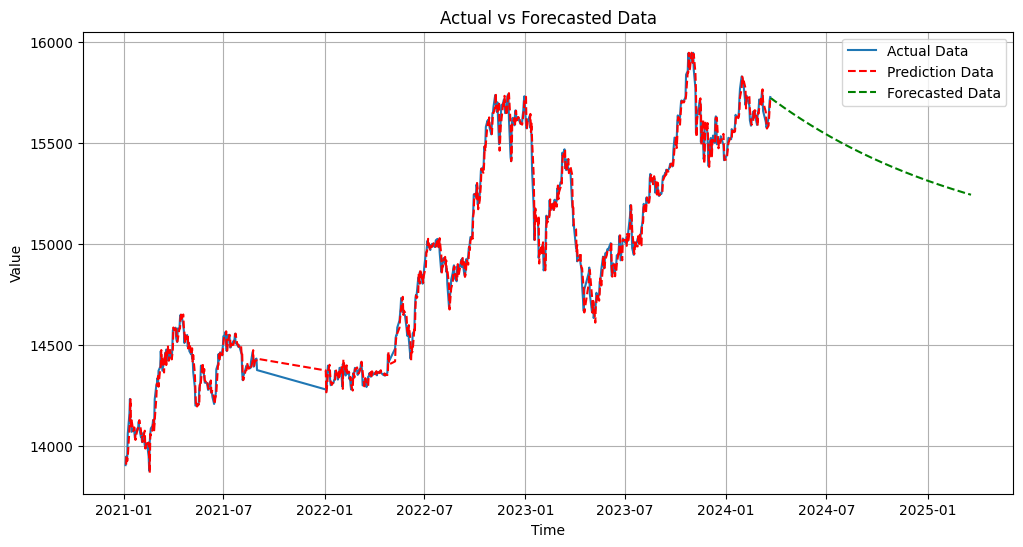

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['kurs tengah'], label='Actual Data')
plt.plot(prediction, label='Prediction Data', linestyle='--', color='red')
plt.plot(df_forecast['nilai_forecast'], label='Forecasted Data', linestyle='--', color='green')
plt.title('Actual vs Forecasted Data vs Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()